In [5]:
#
# 折れ線グラフを描く
#
%matplotlib inline
import datetime
import pymongo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.finance as mf
from matplotlib.dates import date2num

In [2]:
client = pymongo.MongoClient('mongodb://ec2-54-250-245-71.ap-northeast-1.compute.amazonaws.com:27017/bitflyer')
db = client.bitflyer
fx_btc_jpy = db.lightning_executions_FX_BTC_JPY_OHLC_86400
btc_jpy = db.lightning_executions_BTC_JPY_OHLC_86400

In [3]:
fx_btc_jpy_date=[]
fx_btc_jpy_price = []
btc_jpy_date=[]
btc_jpy_price = []

for data in fx_btc_jpy.find().sort('id',1) :
    fx_btc_jpy_date.append(data['op_date'])
    fx_btc_jpy_price.append(data['cl'])
    
for data in btc_jpy.find().sort('id',1) :
    btc_jpy_date.append(data['op_date'])
    btc_jpy_price.append(data['cl'])


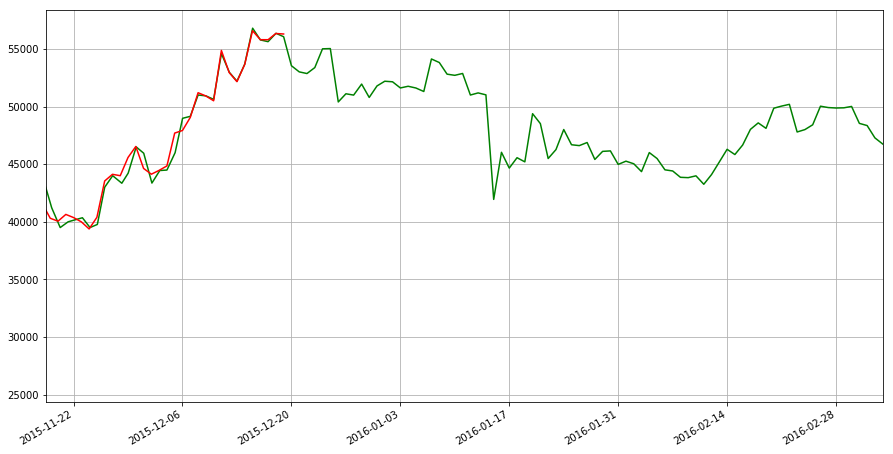

In [4]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.grid()
ax.set_xlim(fx_btc_jpy_date[0], fx_btc_jpy_date[-1])
ax.plot(fx_btc_jpy_date, fx_btc_jpy_price, color='g')
ax.plot(btc_jpy_date, btc_jpy_price, color='r')
fig.autofmt_xdate()